In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.DataFrame()
df = pd.read_excel('ANTF_25-Copy1.xls')
df

,NAME,P0(s),P1,F0(Hz),BINARY(type),PB(days),MinimumMass(Msun),MedianMass(Msun),DIST(kpc),PSRTYPE,R_LUM(mJykpc^2),EDOT(ergs/s),P1_I,AGE_I(Yr),BSURF_I(G)
0,J0002+6216,0.115364,5.970000e-15,8.668248,NaN,NaN,NaN,NaN,6.357,HE[wcp+18],NaN,1.530000e+35,5.960000e-15,306000.0,8.390000e+11
1,J0006+1834,0.693748,2.100000e-15,1.441446,NaN,NaN,NaN,NaN,0.860,NaN,0.148,2.480000e+32,NaN,NaN,NaN
2,J0007+7303,0.315873,3.600000e-13,3.165827,NaN,NaN,NaN,NaN,1.400,NRAD[aab+22],NaN,4.510000e+35,NaN,NaN,NaN
3,J0011+08,2.552870,NaN,0.391716,NaN,NaN,NaN,NaN,5.399,NaN,NaN,NaN,NaN,NaN,NaN
4,J0012+5431,3.025301,1.280000e-16,0.330546,NaN,NaN,NaN,NaN,5.427,RRAT[dcm+23],NaN,1.830000e+29,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,J2355+0051,0.003719,3.220000e-21,268.890043,ELL1,11.751,0.24,0.282,0.959,NaN,NaN,2.470000e+33,NaN,NaN,NaN
4340,J2355+04,0.958000,NaN,1.043841,NaN,NaN,NaN,NaN,1.133,NaN,NaN,NaN,NaN,NaN,NaN
4341,J2355+1523,1.094396,4.190000e-16,0.913746,NaN,NaN,NaN,NaN,3.444,RRAT[dcm+23],NaN,1.260000e+31,NaN,NaN,NaN
4342,J2355+2246,1.840986,3.780000e-15,0.543187,NaN,NaN,NaN,NaN,2.163,NaN,4.210,2.390000e+31,NaN,NaN,NaN


In [8]:
import numpy as np 



ObservedPS = np.array(df)
FARR = []
maxF = 0
def maxFrequncy(df, maxF):
    for i in range(0, 4344):
        if df['F0(Hz)'][i] != '#NA':
            if maxF < float(df['F0(Hz)'][i]):
                maxF = float(df['F0(Hz)'][i])
    return maxF

def RangeThanFrequncy(df, StartRange, EndRange):
    Arr = []
    for i in range(0, 4344):
        if df['F0(Hz)'][i] != '#NA':
            if StartRange < float(df['F0(Hz)'][i]) and EndRange > float(df['F0(Hz)'][i]):
                Arr.append([ObservedPS[i][3]])
    size = np.array([Arr])
    flat_array = size.flatten()
    return flat_array
                

def count_in_range(arr, start_range, end_range):
    arr_numeric = arr.astype(float)  # You can use float or int depending on the data
    count = np.sum((arr_numeric > start_range) & (arr_numeric <= end_range))
    return count

RangeThanFrequncy(df, 700, 800)


array([707.314446, 716.355562])

In [9]:
Arr = []
Arr100 = []
Arr200 = []
Arr300 = []
Arr400 = []
Arr500 = []
Arr600 = []
Arr700 = []
allArr = []
i=0
while i <= 7:
    if i == 0:
        Arr.append(RangeThanFrequncy(df, 0, 100))
        
    if i == 1:
         Arr100.append(RangeThanFrequncy(df, 100, 200))
        
    if i == 2:
         Arr200.append(RangeThanFrequncy(df, 200, 300))
        
    if i == 3:
         Arr300.append(RangeThanFrequncy(df, 300, 400))
        
    if i == 4:
         Arr400.append(RangeThanFrequncy(df, 400, 500))
        
    elif i == 5:
         Arr500.append(RangeThanFrequncy(df, 500, 600))
        
    elif i == 6:
        Arr600.append(RangeThanFrequncy(df, 600, 700))
    elif i ==7:
         Arr700.append(RangeThanFrequncy(df, 700, 800))
    i+=1
        
allArr.append(RangeThanFrequncy(df, 0, 800))

tot = count_in_range(allArr[0],0, 800)
canadates = count_in_range(allArr[0],470, 800)
tot


4279

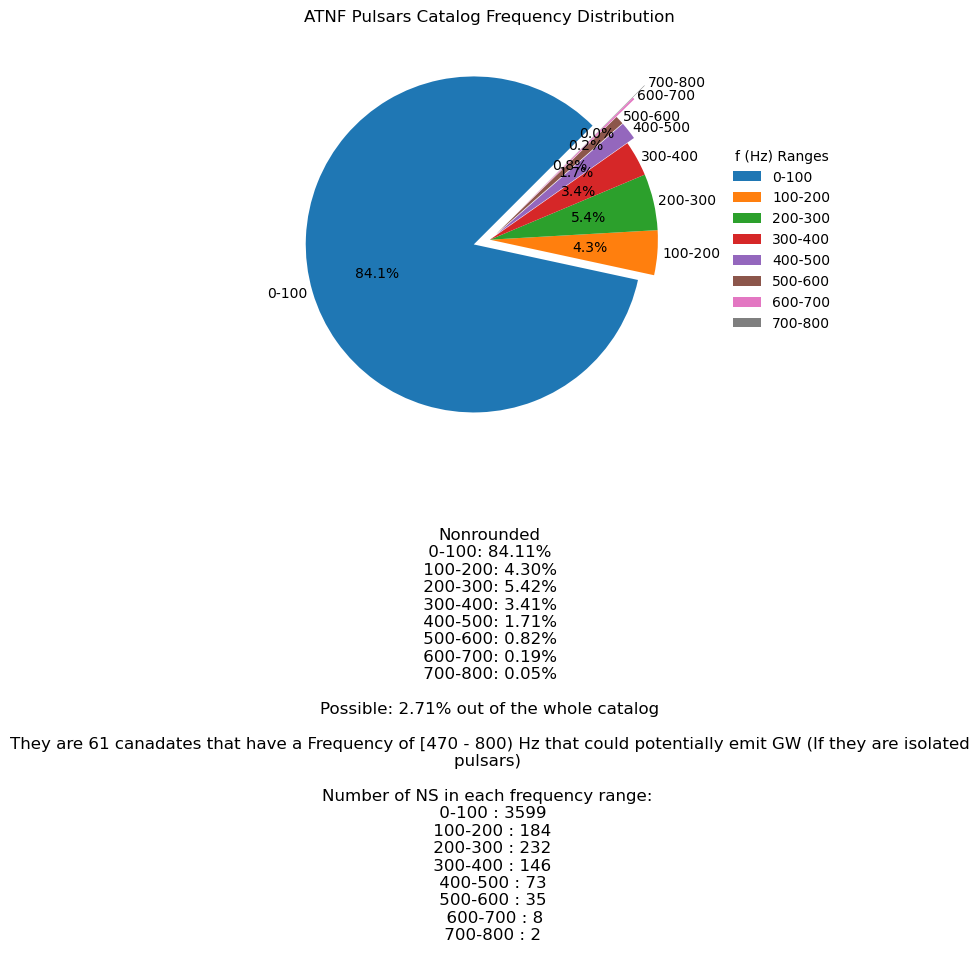

In [10]:
size = [count_in_range(allArr[0], 0,100), count_in_range(allArr[0], 100,200), count_in_range(allArr[0], 200,300),
       count_in_range(allArr[0], 300,400), count_in_range(allArr[0], 400,500), count_in_range(allArr[0], 500,600),
       count_in_range(allArr[0],600, 700),count_in_range(allArr[0], 700,800)]


# Define the labels for each range
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800']

explode = (0.1, 0, 0, 0,0.05,0.05,0.2,0.3)  
# Plotting the pie chart
fig = plt.figure(figsize=(10, 12))

ax1 = fig.add_subplot(211) 
ax1.pie(size, labels=labels, autopct='%1.1f%%',  labeldistance=1.03, startangle=45, explode=explode )  # autopct shows percentage
ax1.set_title('ATNF Pulsars Catalog Frequency Distribution')
ax1.legend(loc="center left", bbox_to_anchor=(1.05, 0.5), title="f (Hz) Ranges", frameon=False)

ax2 = fig.add_subplot(212) 
ax2.axis('off')
text_content = "Nonrounded\n"
for i in range(0,8):
    text_content += f' {labels[i]}: {(size[i]/tot) *100.0 :.2f}% \n'
    
    
possible = 1.762472885032538 + 0.7049891540130151 + 0.1898047722342733 + 0.05422993492407809
text_content += f'\nPossible: {possible:.2f}% out of the whole catalog\n'

text_content += f'\nThey are {canadates} canadates that have a Frequency of [470 - 800) Hz that could potentially emit GW (If they are isolated pulsars) \n'

#number in each range
text_content +=f'\nNumber of NS in each frequency range: \n {labels[0]} : {size[0]}\n {labels[1]} : {size[1]}\n {labels[2]} : {size[2]}\n {labels[3]} : {size[3]}\n {labels[4]} : {size[4]}\n {labels[5]} : {size[5]}\n  {labels[6]} : {size[6]}\n {labels[7]} : {size[7]}\n'
ax2.text(0.5, 0.5, text_content, ha='center', va='center', fontsize=12, wrap=True)
plt.show()

